### Library importing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import .csv to dataframe

In [2]:
df = pd.read_csv('responses.csv')

### Data corrections

In [3]:
df['At what age did you stop?'].replace({"I didn't stop, I still play music or sing": "Never stopped",
                                         "Above 18 years old": "> 18 years old"}, inplace=True)
df['In case you do, at what age did you start?'].replace({"Less than 5 years old": "< 5 years old"}, inplace=True)


### Plotting helpers

In [50]:
# define custom order for age ranges
ages = {"< 5 years old": 0.0,
        "5-8 years old": 1.0,
        "8-13 years old": 2.0,
        "13-18 years old": 3.0,
        "> 18 years old": 4.0,
        "Never stopped": 5.0}
inv_ages = {0.0: "< 5 years old",
            1.0: "5-8 years old",
            2.0: "8-13 years old",
            3.0: "13-18 years old",
            4.0: "> 18 years old",
            5.0: "Never stopped"}

# colors for negative-positive 5-point scale
np_scale = ['darkred', 'lightcoral', 'lightgrey', 'palegreen', 'limegreen']

### Demographic graphs

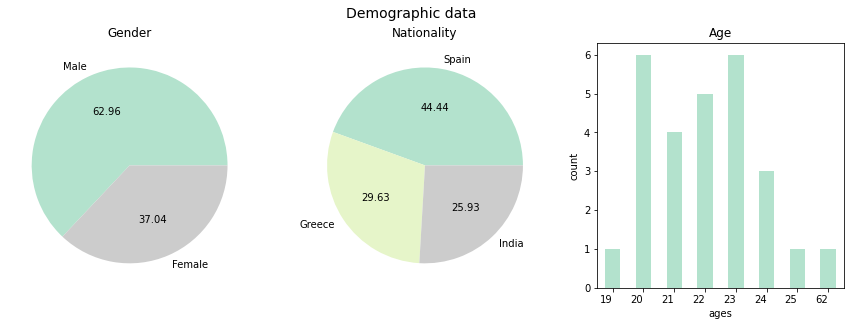

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
fig.suptitle("Demographic data", fontsize=14)

df["Please select your gender:"].value_counts().plot.pie(ax=axes[0], 
                                                         autopct="%.2f", 
                                                         ylabel='', 
                                                         title='Gender', 
                                                         cmap="Pastel2")
                                                         
df["Please specify your nationality:"].value_counts().plot.pie(ax=axes[1], 
                                                               autopct="%.2f", 
                                                               ylabel='', 
                                                               title='Nationality', 
                                                               cmap="Pastel2")
                                                               
df["Please enter your age:"].value_counts().sort_index().plot.bar(ax=axes[2], 
                                                                  xlabel='ages', 
                                                                  ylabel='count', 
                                                                  title='Age', 
                                                                  cmap="Pastel2")

# rotate x labels
fig.autofmt_xdate(rotation=0)

### Music experience

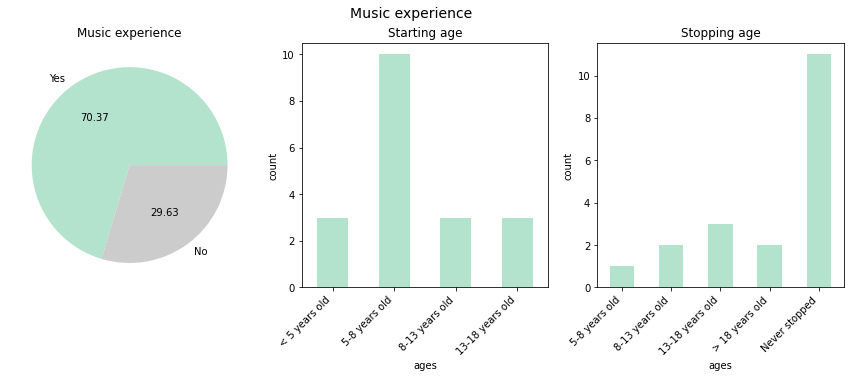

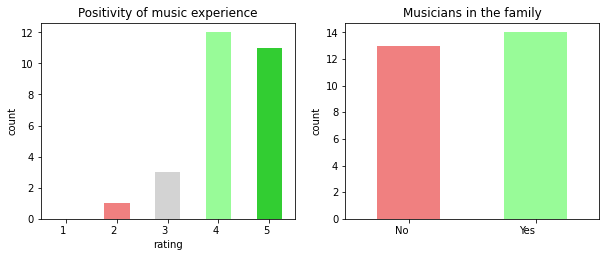

In [77]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.suptitle("Music experience", fontsize=14)

df['Do you have any experience playing a musical instrument or singing?'].value_counts().plot.pie(ax=axes[0], 
                                                                                                  autopct="%.2f", 
                                                                                                  ylabel='', 
                                                                                                  title='Music experience', 
                                                                                                  cmap="Pastel2")

df['In case you do, at what age did you start?'].replace(ages).value_counts().sort_index().plot.bar(ax=axes[1], 
                                                                                                    xlabel='ages',
                                                                                                    ylabel='count', 
                                                                                                    title='Starting age', 
                                                                                                    cmap="Pastel2")

# get indices present in plot
idxs = list(df['In case you do, at what age did you start?'].replace(ages).value_counts().sort_index().index)
# map them back to text responses
axes[1].set_xticklabels(labels=list(map(inv_ages.get, idxs)))
                                                                         
df['At what age did you stop?'].replace(ages).value_counts().sort_index().plot.bar(ax=axes[2], 
                                                                                   xlabel='ages', 
                                                                                   ylabel='count', 
                                                                                   title='Stopping age', 
                                                                                   cmap="Pastel2")
# get indices present in plot
idxs = list(df['At what age did you stop?'].replace(ages).value_counts().sort_index().index)
# map them back to text responses
axes[2].set_xticklabels(labels=list(map(inv_ages.get, idxs)))

# rotate x labels
fig.autofmt_xdate(rotation=45)



fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

np_counts = df['Do you generally think of your musical experience as positive or negative?'].value_counts().sort_index()
np_counts = pd.concat([pd.Series([0]), np_counts])  # add value for 1 which had no reponses
np_counts.sort_index().plot.bar(ax=axes[0],
                                ylabel='count',
                                xlabel='rating',
                                title='Positivity of music experience',
                                color=np_scale)
axes[0].set_xticklabels(labels=['1','2','3','4','5'])
fig.autofmt_xdate(rotation=0)

df['Is someone within your parents or relatives an amateur or professional musician?'].value_counts().sort_index().plot.bar(ax=axes[1],
                                                                                                                            ylabel='count',
                                                                                                                            title='Musicians in the family',
                                                                                                                            color=['lightcoral', 'palegreen'])
fig.autofmt_xdate(rotation=0)




### Childhood

[Text(0, 0, '1'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5')]

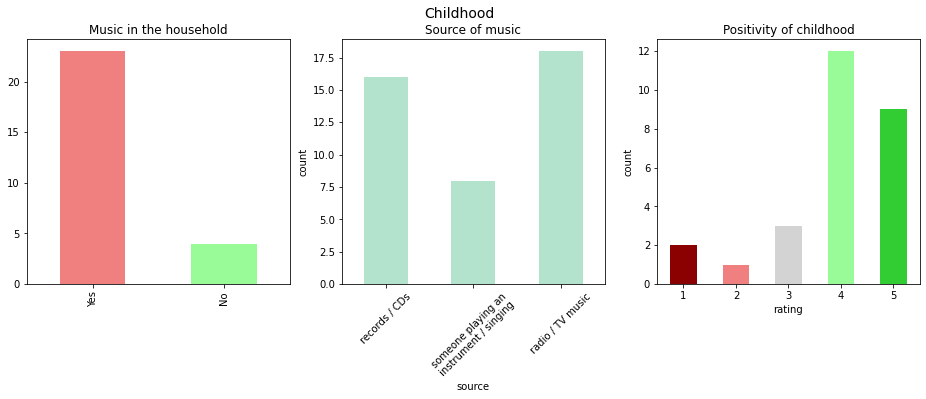

In [119]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,4.5))
fig.suptitle("Childhood", fontsize=14)

df['When you think about your childhood, do you recall music being played regularly at home? '].value_counts().sort_index().plot.bar(ax=axes[0],  
                                                                                                                                     ylabel='', 
                                                                                                                                     title='Music in the household', 
                                                                                                                                     color=['lightcoral', 'palegreen'])

# this was a multiple choice question, so we need to parse each response
means_responses = df['In case music was played at home, it was...'].tolist()
means_labels = ['records / CDs', 'someone playing an instrument / singing', 'radio / TV music']
means_cnt = [0, 0, 0]
# count occurences
for r in means_responses:
    for j, l in enumerate(means_labels):
        if l in str(r):  # cast to string to ignore nan
            means_cnt[j] += 1
means_labels[1] = 'someone playing an\ninstrument / singing'

df_means = pd.DataFrame(list(zip(means_labels, means_cnt)), columns=['labels', 'count'])
df_means.plot.bar(ax=axes[1], 
                  legend=False,
                  ylabel='count', 
                  xlabel='source',
                  title='Source of music', 
                  cmap="Pastel2")
axes[1].set_xticklabels(labels=df_means['labels'], rotation=45)

np_counts = df['Do you generally recall your childhood as positive or negative?'].value_counts().sort_index()
np_counts.sort_index().plot.bar(ax=axes[2],
                                ylabel='count',
                                xlabel='rating',
                                title='Positivity of childhood',
                                color=np_scale)
axes[2].set_xticklabels(labels=['1','2','3','4','5'], rotation=0)